# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19.

Any re-use or publication of any part of the notebook is only allowed with the
written consent of the authors.

2024 (c) Mohammed Salah Al-Radhi (malradhi@tmit.bme.hu)
</PRE>

# Regression example
This Jupyter Notebook contains a basic example of regression with linear regression, random forest and a deep neural network. The dataset we will use is the insurance dataset, which contains information about individuals and their medical insurance costs. We will preprocess the data, visualize it, and train different models on it. Finally, we will evaluate the models and compare their performance.
First, we install [Pytorch Lightning](https://lightning.ai/), which will be used as an easy-to-use interface to PyTorch.


In [ ]:
!pip install pytorch-lightning --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 42.3 MB/s eta 0:00:00


## Data
Download the dataset:

In [ ]:
!wget --no-check-certificate https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2024-10-28 22:44:16--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.02s   

2024-10-28 22:44:16 (3.36 MB/s) - ‘insurance.csv’ saved [54288/54288]



## Imports
Importing libraries for data preprocessing & visualization:

In [ ]:
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for linear algebra
import matplotlib.pyplot as plt # matplotlib for plotting
import seaborn as sns # seaborn for plotting

## DATA PREPROCESSING AND VISUALIZATION

A `df` dataframe is created by reading the contents of the "insurance.csv" file using pandas `read_csv()` method. The "insurance.csv" file contains information about individuals and their medical insurance costs. The `df` dataframe contains 1338 rows and 7 columns. Each row represents an individual and each column represents a feature of that individual such as age, sex, bmi, number of children, smoker or not, region and charges.

In [ ]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have the column names already. There are no 'NaN' values in any of the columns.

The categorical columns contains strings, which have to convert to one-hot vectors. Fortunately, we can easily do this with pandas:

In [ ]:
df = pd.get_dummies(df, drop_first=True) # we have to talk about drop_first -> avoid the dummy variable trap
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [ ]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
sex_male,bool
smoker_yes,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


In [ ]:
df.iloc[:, :4] = df.iloc[:, :4].astype('float32')

<ipython-input-8-890d8b6fbeb9>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :4] = df.iloc[:, :4].astype('float32')
<ipython-input-8-890d8b6fbeb9>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :4] = df.iloc[:, :4].astype('float32')


In [ ]:
df.dtypes

,0
age,float32
bmi,float64
children,float32
charges,float64
sex_male,bool
smoker_yes,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


The following part generates a "heatmap" of pairwise correlations between the features in the `df` dataframe. The `sns.heatmap()` function from the seaborn library is used to create the heatmap. The `annot=True` parameter adds the correlation values to the heatmap.

Pairwise correlation is a measure of the linear relationship between two variables. In the context of linear regression, pairwise correlation is important because it helps us understand how each feature is related to the target variable. If two features are highly correlated, it means that they are providing similar information to the model, which can lead to overfitting. On the other hand, if two features are not correlated, it means that they are providing different information to the model, which can improve the model's performance. Therefore, it is important to check the pairwise correlations between the features before training a linear regression model.

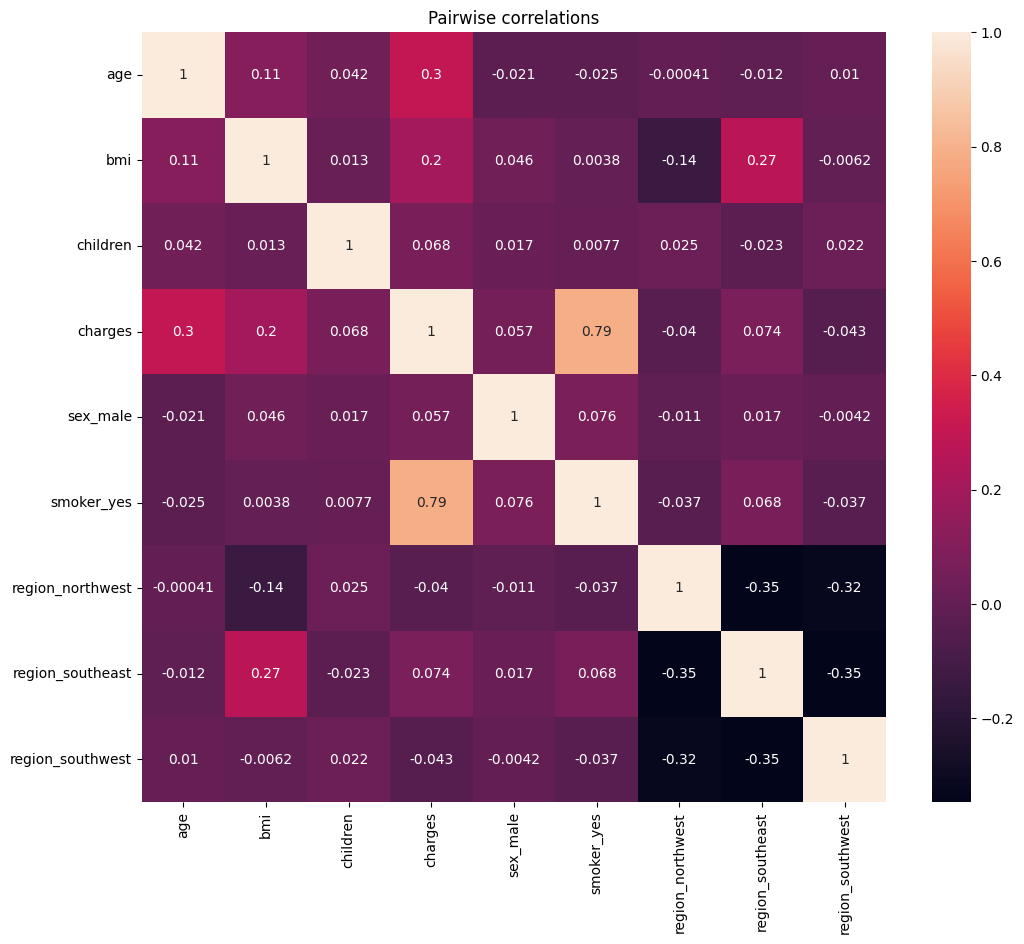

In [ ]:
plt.figure(figsize=(12, 10))
plt.title('Pairwise correlations')
sns.heatmap(data=df.corr(), annot=True)
plt.show()

## Training linear regression and random forest regressors

We split the features and the target variable:


In [ ]:
X = df.drop(columns=['charges']).values # features
y = df['charges'].values # label

Now we split the dataset into train and test sets, and train linear regression and random forest regressors on the test set.

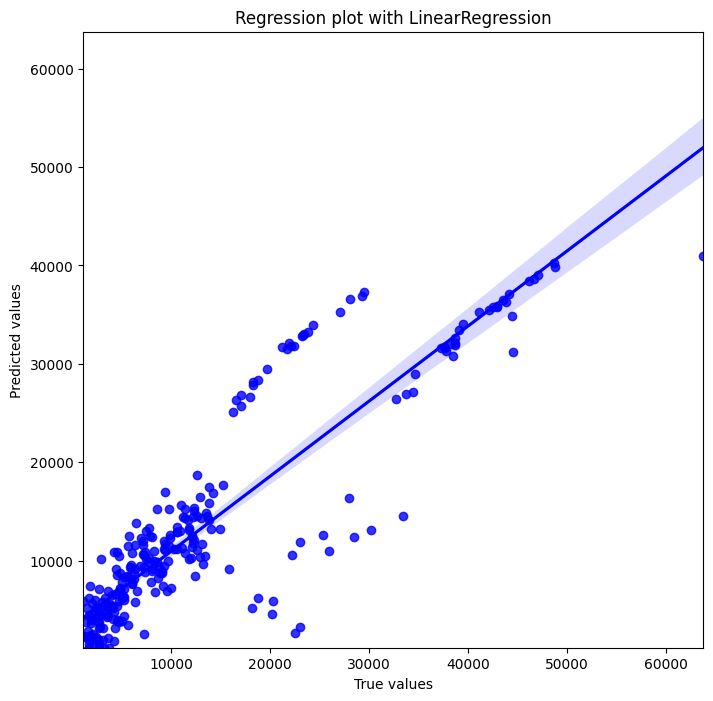

Mean absolute error: 4181.194460844858
Coefficient of determination: 0.7835929764447831


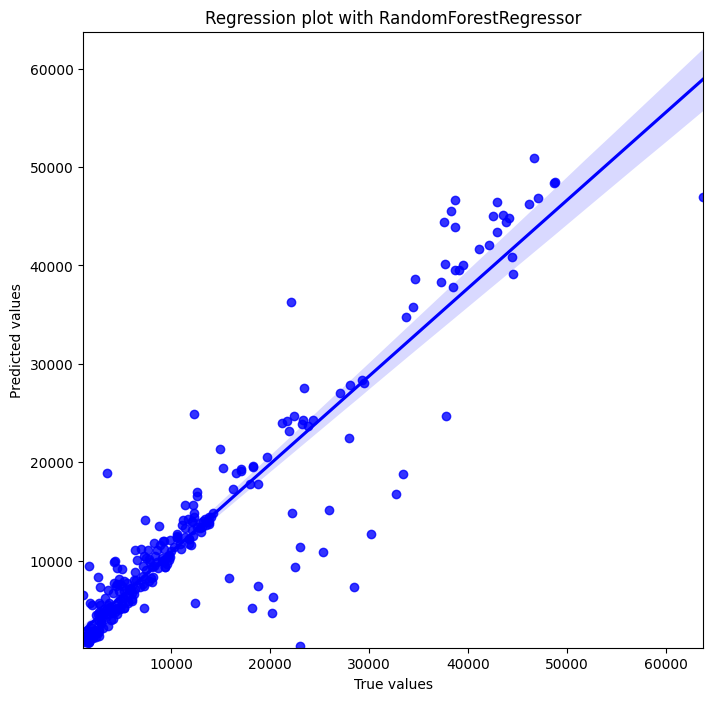

Mean absolute error: 2559.8381647077717
Coefficient of determination: 0.8663311647109234


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # alternative: min-max scaling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for model in [LinearRegression(), RandomForestRegressor()]:
    model.fit(scaler.transform(X_train), y_train)
    y_pred = model.predict(scaler.transform(X_test))
    np.save(model.__class__.__name__, y_pred)
  # regression plot
    plt.figure(figsize=(8, 8))
    sns.regplot(x=y_test, y=y_pred, scatter=True, color='b')
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.xlim(min(y_test), max(y_test))
    plt.ylim(min(y_test), max(y_test))
    plt.title(f"Regression plot with {model.__class__.__name__}")
    plt.show()
  # evaluation
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean absolute error: {mae}")
    r2 = r2_score(y_test, y_pred)
    print(f"Coefficient of determination: {r2}")

## Training a Deep Neural Network Regressor

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pytorch_lightning as pl
import torchmetrics

In [ ]:
np.info(X)

class:  ndarray
shape:  (1338, 8)
strides:  (8, 10704)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x5c1fe6eb15e0
byteorder:  little
byteswap:  False
type: object


In [ ]:
np.info(y)

class:  ndarray
shape:  (1338,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x5c1fe6e03a50
byteorder:  little
byteswap:  False
type: float64


Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Hyperparameters and Dataloaders:

In [ ]:
batch_size = 64
epochs = 200
lr = 0.0005
hidden_dim1 = 64
hidden_dim2 = 128
hidden_dim3 = 256
hidden_dim4 = 128

In [ ]:
def create_dataloader(X, y, batch_size, shuffle=False, num_workers=0):
    X = scaler.transform(X).astype('float32')
    X = torch.from_numpy(X)
    y = y.astype('float32')
    y = torch.from_numpy(y)
    dataset = TensorDataset(X, y)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

train_loader = create_dataloader(X_train, y_train, batch_size, shuffle=True, num_workers=3)
val_loader = create_dataloader(X_val, y_val, batch_size, shuffle=False, num_workers=3)
test_loader = create_dataloader(X_test, y_test, batch_size, shuffle=False)

In [ ]:
class MyFeedForwardNet(pl.LightningModule):
    def __init__(self, num_features, hidden_dim1, hidden_dim2, hidden_dim3,
                         hidden_dim4, lr):
        super(MyFeedForwardNet, self).__init__()
        self.save_hyperparameters()
        self.lr = lr

        # Define model layers
        self.layers = nn.Sequential(
            nn.Linear(num_features, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear( hidden_dim3, hidden_dim4),
            nn.ReLU(),
            nn.Linear( hidden_dim4, 1)# Output layer for regression (no activation)
        )

        # Define loss function
        self.loss = nn.L1Loss()  # Using MAE as the loss function
        self.mae = torchmetrics.MeanAbsoluteError()
        self.r2 = torchmetrics.R2Score()

    # Forward pass
    def forward(self, x):
        return self.layers(x)

    # Training step
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.loss(y_hat, y)
        mae = self.mae(y_hat, y)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_mae", mae, prog_bar=True)
        return loss  # Returning loss for optimizer

    # Validation step
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.loss(y_hat, y)
        mae = self.mae(y_hat, y)
        r2 = self.r2(y_hat, y)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_mae", mae, prog_bar=True)
        self.log("val_r2", r2, prog_bar=True)
        return loss  # Returning loss for monitoring

    # Test step
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.loss(y_hat, y)
        mae = self.mae(y_hat, y)
        self.log("test_loss", loss)
        self.log("test_mae", mae)
        self.log("test_r2", r2)
        return loss  # Returning loss for monitoring

    # Optimizer
    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=self.lr)


TensorBoard logger:

In [ ]:
logger = pl.loggers.TensorBoardLogger("logs/", name="insurance")

In [ ]:
#path="../Deep Learning/insurance_ckpt"

In [ ]:
# we instantiate our model
model = MyFeedForwardNet(X_train.shape[1], hidden_dim1, hidden_dim2, hidden_dim3,
                         hidden_dim4, lr)

# we use the ModelCheckpoint callback to save the best model to a file named best_model.ckpt
callback = pl.callbacks.ModelCheckpoint(
    monitor='val_mae',
    #dirpath = path,
    save_top_k=1,
    mode="min",  # Save the model with the lowest MAE
    filename = 'best_model',
)

# we use the Trainer class to train our model
trainer = pl.Trainer(
    logger=logger,
    max_epochs=epochs,
    log_every_n_steps=1,
    callbacks=[callback],
    #default_root_dir=path
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
import os

In [ ]:
#remove old ckpt file before running (no override option available)
if os.path.exists( 'best_model.ckpt'):
    os.remove('best_model.ckpt')

In [ ]:
trainer.fit(model, train_loader, val_loader) # train the model

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type              | Params | Mode 
-----------------------------------------------------
0 | layers | Sequential        | 74.9 K | train
1 | loss   | L1Loss            | 0      | train
2 | mae    | MeanAbsoluteError | 0      | train
3 | r2     | R2Score           | 0      | train
-----------------------------------------------------
74.9 K    Trainable params
0         Non-trainable params
74.9 K    Total params
0.300     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir C:/Users/Hp/Desktop/logs

In [ ]:
#load best model
model = MyFeedForwardNet.load_from_checkpoint("/content/logs/insurance/version_0/checkpoints/best_model.ckpt")

In [ ]:
# Access the best model's MAE
best_mae = callback.best_model_score
print("Best Model MAE:", best_mae)


Best Model MAE: tensor(2328.9329, device='cuda:0')


In [ ]:
# Access both MAE and R2 scores of the best model
best_mae = callback.best_model_score  # MAE is used for monitoring
print("Best Model MAE:", best_mae)

# Load best checkpoint and calculate R2
best_model = MyFeedForwardNet.load_from_checkpoint(callback.best_model_path)
val_r2 = trainer.test(best_model, test_loader)[0]['test_r2']
print("Best Model R2:", val_r2)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best Model MAE: tensor(2328.9329, device='cuda:0')


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1877.542724609375     │
│         test_mae          │     1877.542724609375     │
│          test_r2          │     0.866331160068512     │
└───────────────────────────┴───────────────────────────┘

Best Model R2: 0.866331160068512


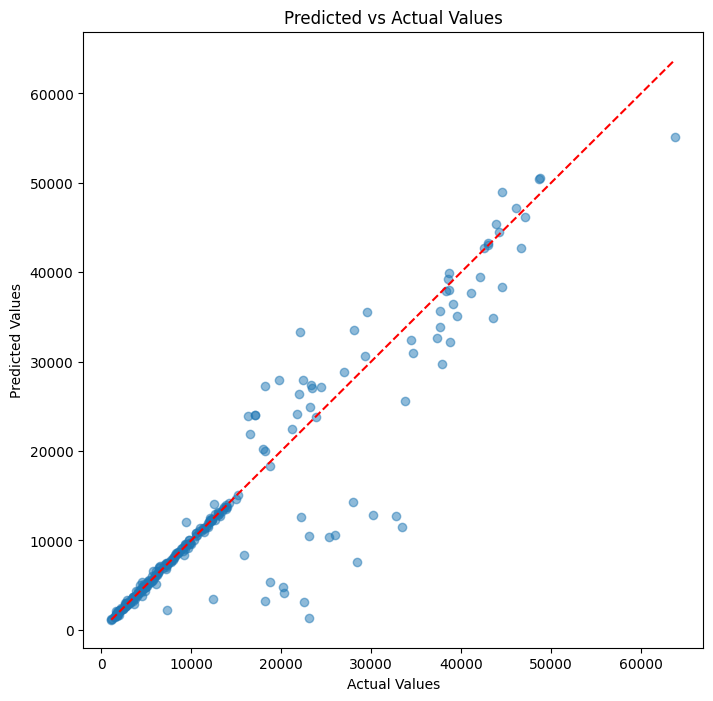

In [ ]:
# Run predictions on the test set
model.eval()
preds, actuals = [], []

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(model.device), y.to(model.device)
        y_hat = model(x).squeeze()
        preds.extend(y_hat.cpu().numpy())
        actuals.extend(y.cpu().numpy())

# Plot predictions vs actuals
plt.figure(figsize=(8, 8))
plt.scatter(actuals, preds, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


## Ensemble

In [ ]:
# Set best model in evaluation mode
model.eval()

# Check the device of the model (it should be on GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare test data for predictions and move to the same device as the model
X_test_tensor = torch.from_numpy(scaler.transform(X_test).astype(np.float32)).to(device)

# Get predictions for FeedForwardNet
with torch.no_grad():
    y_pred_FeedForwardNet = model(X_test_tensor).squeeze().cpu().numpy()  # Move predictions back to CPU for numpy compatibility

# Get predictions for RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(scaler.transform(X_train), y_train)
y_pred_RandomForestRegressor = rf_model.predict(scaler.transform(X_test))

# Ensemble predictions
y_pred_ensemble = 0.5 * y_pred_FeedForwardNet + 0.5 * y_pred_RandomForestRegressor

# Evaluate ensemble predictions
ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)

# Save results to CSV
results_df = pd.DataFrame({
    "Model": ["Ensemble"],
    "MAE": [ensemble_mae],
    "R2": [ensemble_r2]
})
results_df.to_csv("ensemble_results.csv", index=False)

print("Ensemble results saved to ensemble_results.csv")
print("Ensemble MAE:", ensemble_mae)
print("Ensemble R²:", ensemble_r2)


Ensemble results saved to ensemble_results.csv
Ensemble MAE: 2059.5275285680973
Ensemble R²: 0.8810175115253315


## **ASSIGNMENT**: Regression with neural networkcheckpoint

Your tasks are the following.


---


1. Create and train a FeedForward Neural Network with PyTorch Lightning. Use ModelCheckPoint as callback, and save the best performing model (in terms of MAE) into a ckpt file named *best_model.ckpt*. 50 points


---


2. Save the MAE and the R2 score of your best performing model into a csv file called *mlp_results.csv*. The MAE must be lower and the R2 score must be higher than in linear regression. 20 points.


---


3. Ensemble your neural network model with RandomForestRegressor following the formula
`y_pred_ensemble = 0.5 * y_pred_FeedForwardNet + 0.5 * y_pred_RandomForestRegressor`.
Save the MAE and the R2 score of the ensemble into a csv file called *ensemble_results.csv*.  30 points


---


Besides the Python codes / IPYNB, the CSV files must be saved directly into the git repository you submit.


Some thoughts on ensembles:
*   https://en.wikipedia.org/wiki/Ensemble_learning
*   https://ensemble-pytorch.readthedocs.io/
*   https://arxiv.org/abs/2106.03253